# A nasty integral
Using Monte Carlo integration, check that:

$$
\int_0^\infty x^3 e^{-\frac{x^2}{2 \sigma^2}} \, dx = 2 \sigma^4
$$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given N how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks very accurate! And if N is small?)
- How does the distribution change if N increases?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [11]:
def f_int(x,sigma):
    func= x**3 * np.exp(-(x**2) / (2 * sigma**2))
    return np.abs(func)

In [12]:
def f(x):
    return np.abs(x**3)

In [13]:
def montecarlo(func,sigma,N):
    xi=np.random.normal(0, sigma, N)
    integral= sigma*math.sqrt(2*math.pi)*np.mean(func(xi))
    return integral/2

In [14]:
sigma=1
N=100000 #Number of samples
integral_gauss=montecarlo(f, sigma, N)
knownresult= 2*sigma**4
print("The Monte Carlo integral value with the normal distribution is", integral_gauss)
print("The true integrale value is", knownresult)

The Monte Carlo integral value with the normal distribution is 1.978308731146749
The true integrale value is 2


[]

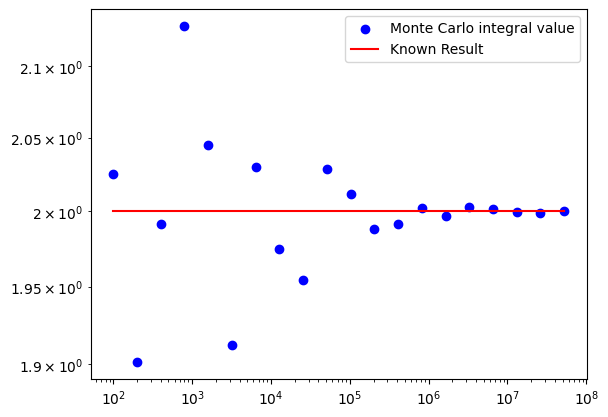

In [15]:
N=100
n=20 #Number of integrals
integral_gauss=[]
number_integral=[]
for i in range(n):
    integral_gauss.append(montecarlo(f, sigma, N))
    number_integral.append(N)
    N=N*2

plt.scatter(number_integral,integral_gauss, color="blue", label="Monte Carlo integral value")
y = knownresult * np.ones_like(number_integral)
plt.plot(number_integral, y, color="red", label="Known Result")
plt.legend()
plt.loglog()



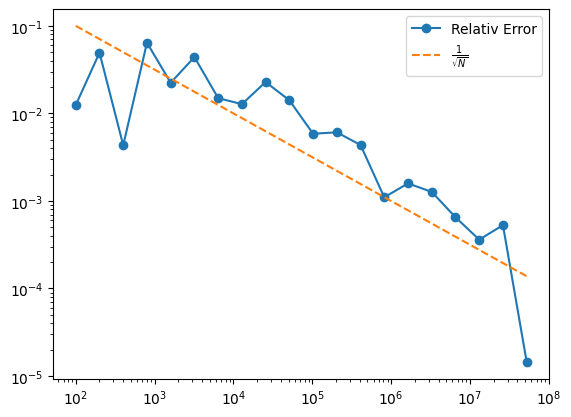

In [16]:
integral_gauss = np.array(integral_gauss)
number_integral = np.array(number_integral)
errors = np.abs((integral_gauss - knownresult) / knownresult)
    
plt.plot(number_integral, errors, label="Relativ Error", marker="o")
plt.plot(number_integral, number_integral**-0.5, label=r"$\frac{1}{\sqrt{N}}$", linestyle="--")
plt.loglog()
plt.legend()

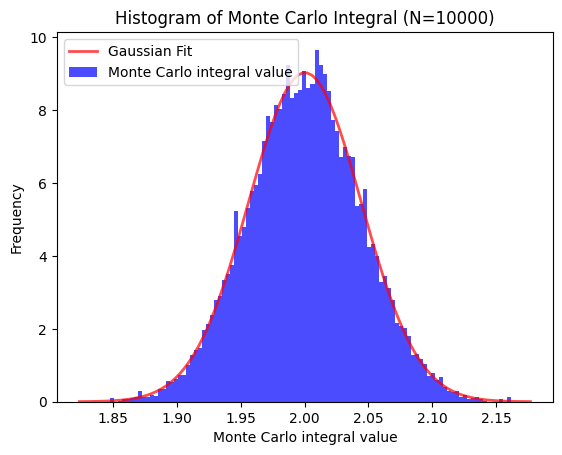

In [20]:
N=10000
n=10000 #Number of integrals
integral_gauss=[]
for i in range(n):
    integral_gauss.append(montecarlo(f, sigma, N))


integral_gauss = np.array(integral_gauss)
mu, sigma_mc = np.mean(integral_gauss), np.std(integral_gauss)
x = np.linspace(mu - 4*sigma_mc, mu + 4*sigma_mc, 100)
gaussian_fit = norm.pdf(x, mu, sigma_mc)
plt.plot(x, gaussian_fit, 'r-', lw=2, alpha=0.7, label="Gaussian Fit")
plt.hist(integral_gauss, bins=100, density=True, alpha=0.7, color='blue',label="Monte Carlo integral value" )
plt.title(f'Histogram of Monte Carlo Integral (N={N})')
plt.xlabel('Monte Carlo integral value')
plt.ylabel('Frequency')
plt.legend()

